In [48]:
#MID ADD
from sklearn.neighbors import KNeighborsClassifier


In [49]:
#Second, other examples were taken from various sources to illustrate data manipulation & various graphing.  
#This dataset uses make_blobs to create X2, Y2

In [50]:
#from book MachineLearningAlgorithms_packt_Code, Chapter 5, sample 1logistic_regression)
from __future__ import print_function

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

# For reproducibility
np.random.seed(1000)

nb_samples = 100


def show_dataset(X, Y):
    fig, ax = plt.subplots(1, 1, figsize=(10, 7)) #figsize=(30, 25))

    ax.grid()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    print("X Length",X.shape,X.shape[0])
    max_y=np.max(Y)
    print("Max y",max_y)
    for i in range(X.shape[0]):#nb_samples
        if Y[i] == 0:
            ax.scatter(X[i, 0], X[i, 1], marker='o', color='r')
        else: #Modify default: no if else statement, only plot: ax.scatter(X[i, 0], X[i, 1], marker='^', color='b')
            if(max_y<=1 or Y[i]== 1): 
                
                ax.scatter(X[i, 0], X[i, 1], marker='^', color='b')
            else:
                if Y[i] == 2:
                    ax.scatter(X[i, 0], X[i, 1], marker='x', color='g')

    plt.show()


def show_classification_areas(X, Y, lr):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(30, 25))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=np.abs(Y - 1), edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel('X')
    plt.ylabel('Y')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()









In [51]:
#X2, Y2 (blob dataaset found in  )
#https://scikit-learn.org/stable/auto_examples/calibration/plot_calibration.html
#MID Adjusted cluster parameters & Standard deviation, etc.


from sklearn.datasets import make_blobs
centers = [(2, -5), (1.5, 0), (1, 5)]
X2, Y2 = make_blobs(n_samples=nb_samples*6, n_features=2, cluster_std=1.5,
                  centers=centers, shuffle=False, random_state=42)
display(X2)

array([[ 2.74507123, -5.20739645],
       [ 2.97153281, -2.71545522],
       [ 1.64876994, -5.35120544],
       ...,
       [-1.3894906 ,  5.66071211],
       [ 0.9705433 ,  5.82873493],
       [ 1.3358712 ,  7.04621064]])

In [52]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.3)


In [53]:
#MID add, convert from arrays to a Dataframe
import pandas as pd
c1=np.c_[X_train2,Y_train2]
c2=np.c_[X_test2,Y_test2]
#display(c)
d1={'Xtrain0':c1[:,0],'Xtrain1':c1[:,1],'Ytrain':c1[:,2]}
d2={'Xtest0':c2[:,0],'Xtest1':c2[:,1],'Ytest':c2[:,2]}
#,'Xtest':X_test2,'Ytrain':Y_train2,'Ytest':Y_test2}
XYtrain2=pd.DataFrame(data=d1)
XYtest2=pd.DataFrame(data=d2)
#print(XYtrain2[XYtrain2['Ytrain']==0]['Xtrain0'])
print("# of training datapoints",len(XYtrain2))
print("display first 15 rows of training")
display(XYtrain2[:15])

# of training datapoints 420
display first 15 rows of training


,Xtrain0,Xtrain1,Ytrain
0,3.624577,-3.419297,0.0
1,2.076098,-0.049042,1.0
2,1.854651,5.671563,2.0
3,2.336139,-4.981111,0.0
4,0.477022,4.476113,2.0
5,2.484078,-6.240846,0.0
6,1.405981,1.432713,1.0
7,-0.942022,6.741240,2.0
8,5.284704,-6.212447,0.0
9,0.840762,-5.355228,0.0


In [54]:
print("# of test datapoints",len(XYtest2))
print("display first 15 rows of test")
display(XYtest2[:15])

# of test datapoints 180
display first 15 rows of test


,Xtest0,Xtest1,Ytest
0,0.223583,5.335682,2.0
1,-0.121595,0.923903,1.0
2,2.260965,4.021064,2.0
3,3.744746,-4.984650,0.0
4,1.294782,6.063506,2.0
5,1.621148,-6.871675,0.0
6,1.884045,1.474036,1.0
7,1.249678,5.738677,2.0
8,3.373103,-4.506873,0.0
9,-0.644413,2.839924,2.0


          Xtrain0     Xtrain1
count  137.000000  137.000000
mean     2.048121   -4.931131
std      1.452944    1.472275
min     -2.861901   -7.981353
25%      0.946920   -5.900325
50%      2.104703   -4.824009
75%      2.880286   -4.049121
max      5.471988    0.779097

Correlation:
-0.20068672469362822


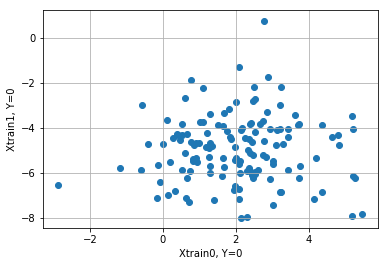

In [55]:
# From Microsoft Intro Data Science Lab 4 in Azure, adopted
print(XYtrain2[XYtrain2['Ytrain']==0][['Xtrain0','Xtrain1']].describe())
# Print correlation for temperature vs Sales
print('\nCorrelation:')
print(XYtrain2['Xtrain0'].corr(XYtrain2['Xtrain1']))
# Plot Temperature vs Sales
plt.xlabel('Xtrain0, Y=0')
plt.ylabel('Xtrain1, Y=0')
plt.grid()
plt.scatter(XYtrain2[XYtrain2['Ytrain']==0]['Xtrain0'],XYtrain2[XYtrain2['Ytrain']==0]['Xtrain1'])

plt.show()

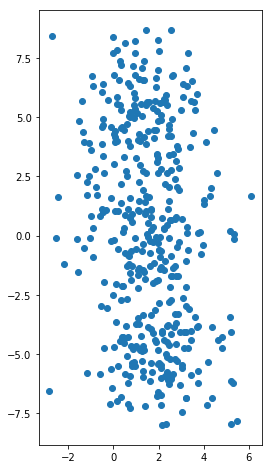

In [56]:
plt.rcParams["figure.figsize"]=[4.0,8.0]
plt.scatter(XYtrain2['Xtrain0'],XYtrain2['Xtrain1'])
plt.show()

In [57]:
# Create logistic regressor (main book code file)
lr = LogisticRegression()
lr.fit(X_train, Y_train)
print('Logistic regression score: %.3f' % lr.score(X_test, Y_test))

    # Compute CV score
lr_scores = cross_val_score(lr, X, Y, scoring='accuracy', cv=10)
print('Logistic regression CV average score: %.3f' % lr_scores.mean())


Logistic regression score: 0.960
Logistic regression CV average score: 0.970


In [58]:
#This is added code in addition to the 1logistic_regression file, using the blob dataset
#Make blobs logistic regression
# Create logistic regressor
lr2 = LogisticRegression()
lr2.fit(X_train2, Y_train2)
print('Blob dataset Logistic regression score: %.3f' % lr2.score(X_test2, Y_test2))

    # Compute CV score
lr_scores2 = cross_val_score(lr2, X2, Y2, scoring='accuracy', cv=10)
print('Logistic regression CV average score: %.3f' % lr_scores2.mean())




Blob dataset Logistic regression score: 0.911
Logistic regression CV average score: 0.913


In [59]:
print("Manually calculated regression score:")
print(np.sum(Y_test2==lr2.predict(X_test2))/Y_test2.shape)
print(Y_test2.shape)
a=lr2.predict_proba(X_test2)
print("predict_proba(X_test2)");print(a)
prob_xtest2=[]
for i in range(a.shape[0]):
    print("a[",i,"][0]",a[i][0])
    prob_xtest2.append((a[i][0]))
    

print("X1,X2,Y_test,predict,match of Y to predictions")
print(np.c_[X_test2,Y_test2, lr2.predict(X_test2),Y_test2==lr2.predict(X_test2),np.array(prob_xtest2).astype(float)][:50])

Manually calculated regression score:
[0.91111111]
(180,)
predict_proba(X_test2)
[[6.21757176e-06 2.62133076e-01 7.37860706e-01]
 [1.19238964e-02 7.32946397e-01 2.55129706e-01]
 [6.26990628e-05 2.59897818e-01 7.40039483e-01]
 [7.59931731e-01 2.40061150e-01 7.11940664e-06]
 [2.39695269e-06 2.49108993e-01 7.50888610e-01]
 [7.38154887e-01 2.61844493e-01 6.20315894e-07]
 [6.48963050e-03 6.40333924e-01 3.53176445e-01]
 [3.88555224e-06 2.50451709e-01 7.49544405e-01]
 [7.53685100e-01 2.46299011e-01 1.58887736e-05]
 [2.85070594e-04 3.34300497e-01 6.65414432e-01]
 [3.67519696e-04 3.35132134e-01 6.64500346e-01]
 [7.42079013e-01 2.57919977e-01 1.00916068e-06]
 [4.83412899e-07 2.54828013e-01 7.45171504e-01]
 [7.29415273e-01 2.70578768e-01 5.95951763e-06]
 [7.09116088e-01 2.90820098e-01 6.38146506e-05]
 [8.06147755e-07 2.51133303e-01 7.48865891e-01]
 [6.81699603e-02 8.62930854e-01 6.88991856e-02]
 [7.32883346e-01 2.67110680e-01 5.97359563e-06]
 [8.39335423e-02 8.62393560e-01 5.36728974e-02]
 [7.634

In [60]:
lr2.decision_function(X_test2)

array([[-11.6936961 ,  -0.61080299,   4.64396167],
       [ -5.10982757,  -0.5370794 ,  -1.91519636],
       [ -9.47643983,  -0.7646131 ,   2.24792974],
       [  4.22428461,  -0.79385476, -11.59267999],
       [-12.65882183,  -0.70626624,   5.51680008],
       [  6.80456767,  -0.60003566, -13.99054262],
       [ -5.69661005,  -0.70746098,  -1.50218443],
       [-12.1764168 ,  -0.69922111,   5.03792678],
       [  3.46246931,  -0.76824551, -10.79796749],
       [ -8.04945759,  -0.51384607,   1.07220981],
       [ -7.88130707,  -0.64409785,   0.76629853],
       [  6.29393586,  -0.63259172, -13.50993644],
       [-14.24902014,  -0.65568264,   7.17265869],
       [  4.61529146,  -0.54374513, -11.72485148],
       [  2.3469908 ,  -0.51376631,  -9.40706339],
       [-13.74312045,  -0.68606156,   6.6309071 ],
       [ -3.59087191,  -0.66470696,  -3.57993654],
       [  4.58865917,  -0.57190471, -11.72749987],
       [ -3.28584083,  -0.53003898,  -3.74635499],
       [  7.4479165 ,  -0.80159

Predicted dataset
X Length (180, 2) 180
Max y 2


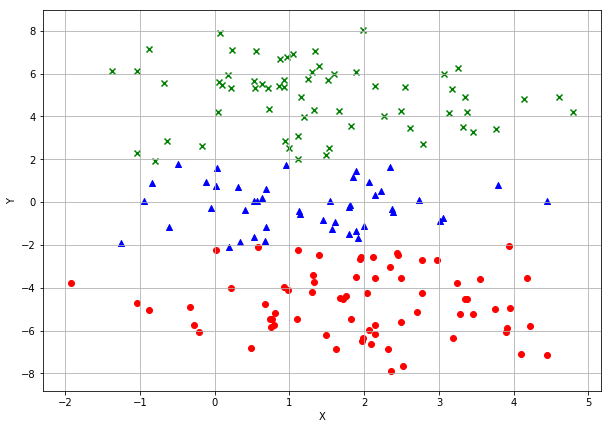

Original/Actual dataset
X Length (600, 2) 600
Max y 2


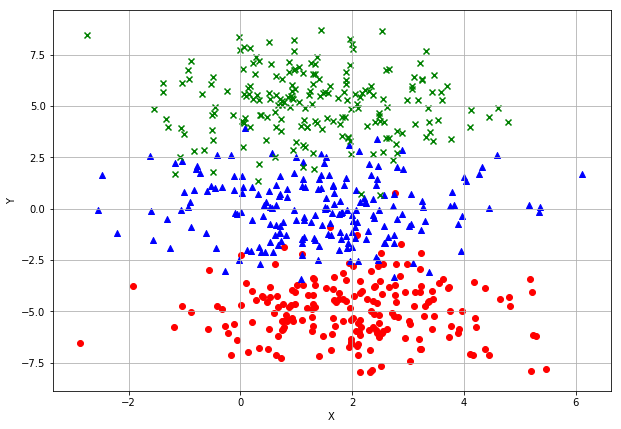

In [61]:
#MID added
print("Predicted dataset")
show_dataset(X_test2, lr2.predict(X_test2))
print("Original/Actual dataset")
show_dataset(X2, Y2)


previous plt_size [4.0, 8.0]


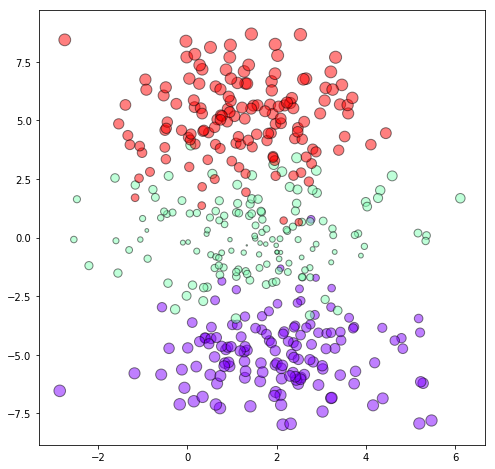

In [62]:
#Different type of plot.  Some code taken from 
# https://scikit-learn.org/stable/auto_examples/calibration/plot_calibration.html
# and sample weight code was removed
from matplotlib import cm
y_unique = np.unique(Y2)
colors = cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
plt_size = plt.rcParams["figure.figsize"]
print("previous plt_size",plt_size)
plt.rcParams["figure.figsize"]=[8.0,8.0]
for this_y, color in zip(y_unique, colors):
    this_X = X_train2[Y_train2 == this_y]
    #this_sw = sw_train[Y_train2 == this_y]
    #print("this_X,",this_X[:,1],"s=",np.abs(this_X[:,1])*100)
    plt.scatter(this_X[:, 0], this_X[:, 1],  c=color, s=np.sqrt(np.abs(+this_X[:,0]/4+this_X[:,1]))*50,#s=this_sw * 50,
                alpha=0.5, edgecolor='k',
                label="Class %s" % this_y)

In [63]:
#MID add
#recall X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.3)
knn=KNeighborsClassifier(n_neighbors=3,n_jobs=-1).fit(X_train2,Y_train2)
knn.predict([[-1,7.5],[-0.75,6.5],[-0.5,5.5],[-0.25,4.5],[0,3.5],[0.25,2.5],[0.5,1.5],[0.75,0.5],[1,-0.5],[1,-1.5],[1,-2.5],[1,-3.5],[1,-4.5],[1,-5.5],[1,-6.5],[1,-7.5]])

array([2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [64]:
#MID added
print(sum(knn.predict(X_test2)==Y_test2)," Correctly classified test samples out of ",len(Y_test2))
test_acc = sum(knn.predict(X_test2)==Y_test2)/len(Y_test2)
train_acc = sum(knn.predict(X_train2)==Y_train2)/len(Y_train2)
print("Test Accuracy=",test_acc)
print("Train Accuracy (Illustration purposes only)=",train_acc)


167  Correctly classified test samples out of  180
Test Accuracy= 0.9277777777777778
Train Accuracy (Illustration purposes only)= 0.9404761904761905


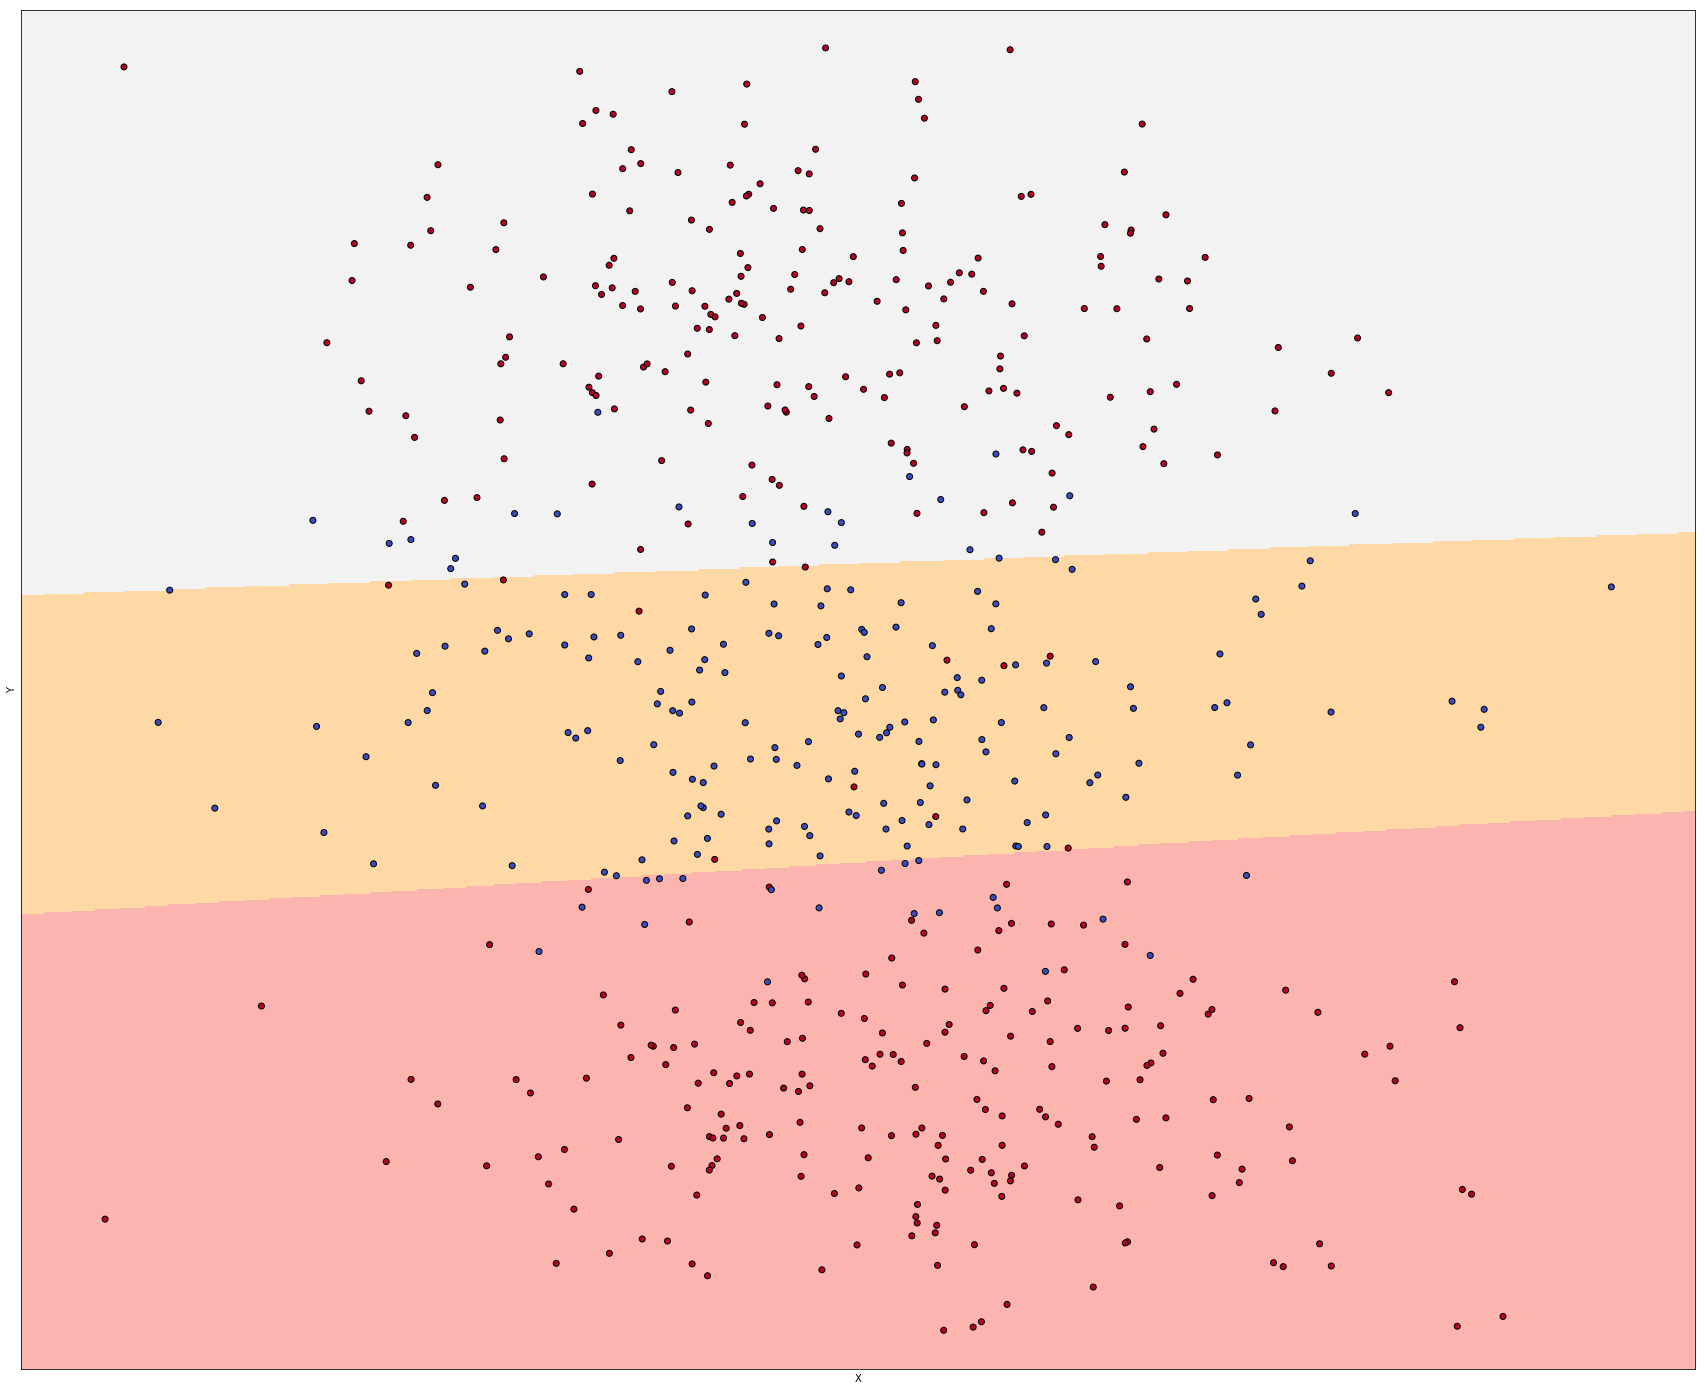

In [65]:
show_classification_areas(X2, Y2, lr2)

New Test Accuracy, previous test accuracy 0.6666666666666666 0.9277777777777778
X Length (600, 2) 600
Max y 2


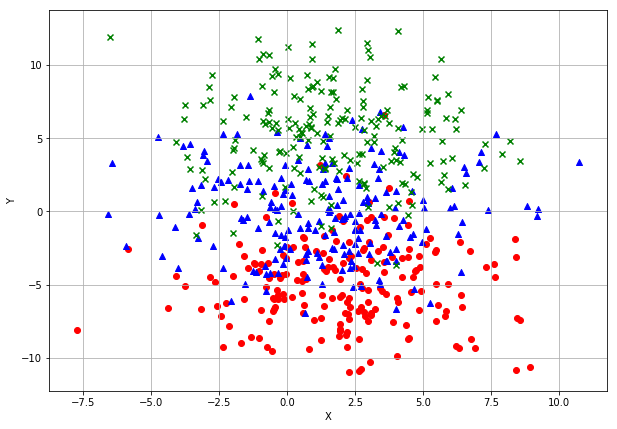

In [69]:
#Quick, condensed  illustration of degradation of accuracy as the blobs become more overlapping 
#(increase standard deviation from 1.5 to 3)
#centers = [(2, -5), (1.5, 0), (1, 5)]
X2, Y2 = make_blobs(n_samples=nb_samples*6, n_features=2, cluster_std=3,
                  centers=centers, shuffle=False, random_state=42)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.3)
knn=KNeighborsClassifier(n_neighbors=3,n_jobs=-1).fit(X_train2,Y_train2)


test_acc2 = sum(knn.predict(X_test2)==Y_test2)/len(Y_test2)
train_acc2 = sum(knn.predict(X_train2)==Y_train2)/len(Y_train2)
print("New Test Accuracy, previous test accuracy",test_acc2,test_acc)
#print("Train Accuracy (Illustration purposes only)=",train_acc)
show_dataset(X2, Y2)